In [1]:
!pip install scikit-learn pandas graphviz pydotplus

In [2]:
##Necessary Imports
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
import pydotplus
from IPython.display import Image

## 1) Decision Tree Algorithm

A decision tree is a flowchart-like structure where:

- The topmost node is the Root Node: this represents the entire population or a sample, and it is further
divided into two or more further nodes.
- An internal Decision Node represents a feature: when a subnode splits into further subnodes, it is
called decision node.
- A branch represents a decision rule - Splitting: a process of dividing a node into two or more subnodes
based on a certain rule.
- A Leaf/Terminal Node represents an outcome: the final node in a decision.

- The decision tree is a **white-box** type of machine learning algorithm. It shares the logic of internal decisionmaking, which is not available in black-box algorithms, such as neural networks.
- Its training time is **relatively fast** compared to the neural network algorithm. The time complexity of decision trees is a function of the
number of records and the number of attributes in a given data.
- The decision tree is a **distribution-free or non-parametric method**, which does not rely on probability distribution assumptions. Decision trees can handle higher dimensional data with **better accuracy**.

The intuition behind any decision tree algorithm is as follows:
1. Select the best attribute using attribute selection measures (ASM) to split records.
2. Turn that attribute into a decision node and split the dataset into smaller subsets.

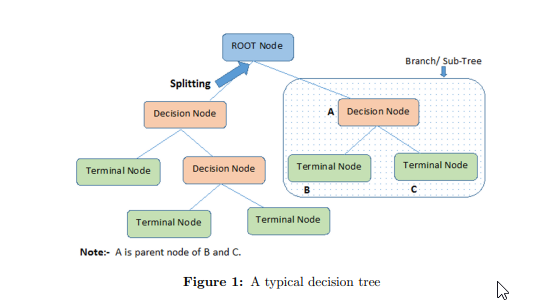

3. Start building the tree by repeating this process recursively to each child until one of the conditions is
met:
- All tuples belong to the same attribute value.
- No more remaining attributes.
- No more instances.

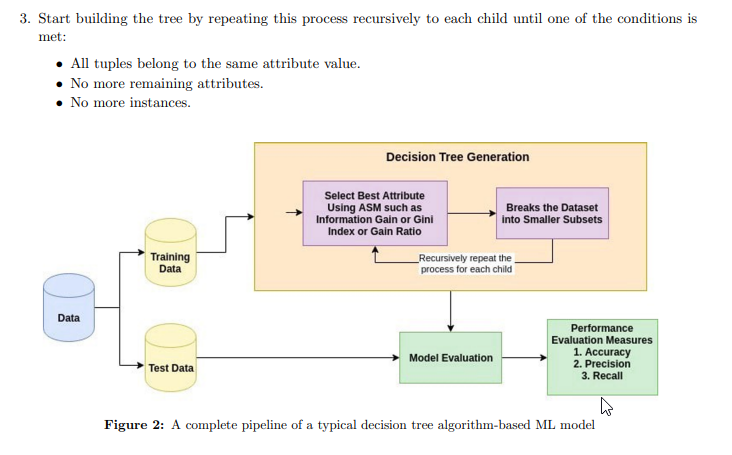

### 1.1 Attribute Selection Measures (ASM)
ASM is a heuristic for selecting data splitting criteria in the best possible way. It is also known as splitting rules because it helps us to determine breakpoints for tuples on a given node. ASM provides a ranking for each feature (or attribute) by explaining the given dataset. The best score attribute is selected as a splitting attribute (Devi and Nirmala, 2013). In the case of a continuous-valued attribute, split points for branches should also be defined. The most popular selection measures are information gain, gain ratio, and Gini index.

#### 1.1.1 Information Gain
Shannon (1948) invented the concept of entropy, which measures the impurity of the input set. In general, entropy is referred to as the randomness or the impurity in a system. **In information theory, it refers to the impurity in a group of examples**. **Information gain means decreasing entropy**. It computes **the difference between the entropy before splitting and the average entropy after splitting the dataset based on given attribute values**. The iterative dichotomiser (ID3) decision tree algorithm uses entropy to calculate information gain.
Shannon entropy is defined as:

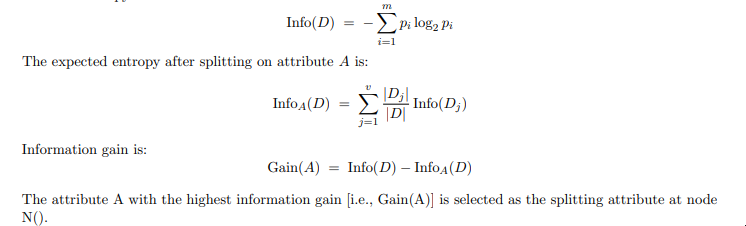

#### 1.1.2 Gain Ratio

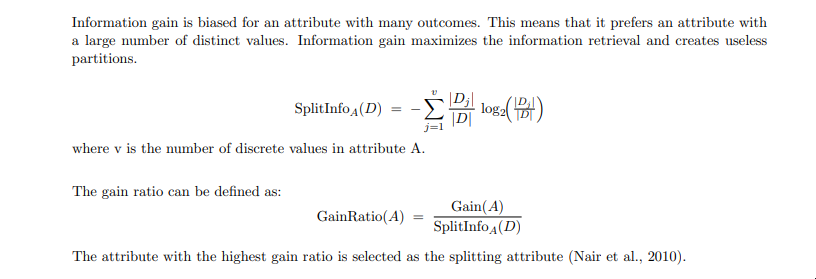

#### 1.1.3 Gini Index (CART)

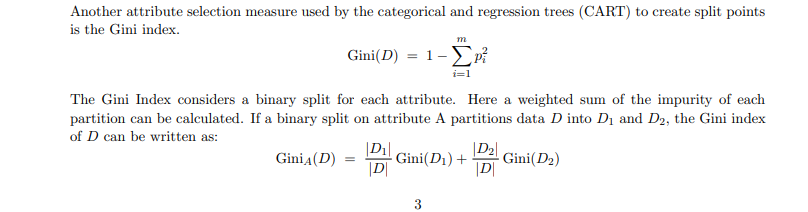

In the case of a discrete-valued attribute, the subset that gives the minimum Gini index is selected as a splitting attribute, and in the case of continuous-valued attributes, the strategy is to select each pair of adjacent values as a possible split-point and point with a smaller Gini index as the splitting point.

###1.2 Dataset Description

In this lab work, the Pima Indians Diabetes dataset is used to build the decision tree. This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is
to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage. The dataset can be downloaded from Kaggle using the following url: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

### 1.3 Building Decision Trees

##### i. Importing libraries

In [3]:
import pandas as pd
from sklearn . tree import DecisionTreeClassifier
from sklearn . model_selection import train_test_split
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

##### ii. Dataset loading and exploratory data analysis
Loading Dataset

In [4]:
diabetes_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/diabetes.csv')
diabetes_df.head() # Preview the dataset
diabetes_df.shape # Number of instances and variables

(768, 9)

###### Renaming columns

In [5]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
diabetes_df.columns = col_names  # Rename column names

###### Summary of Dataset

In [6]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pregnant  768 non-null    int64  
 1   glucose   768 non-null    int64  
 2   bp        768 non-null    int64  
 3   skin      768 non-null    int64  
 4   insulin   768 non-null    int64  
 5   bmi       768 non-null    float64
 6   pedigree  768 non-null    float64
 7   age       768 non-null    int64  
 8   label     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


###### Frequency distributions of values in variables

In [7]:
for col in col_names :
  print(diabetes_df[col].value_counts())

pregnant
1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
17      1
15      1
Name: count, dtype: int64
glucose
99     17
100    17
111    14
125    14
129    14
       ..
56      1
169     1
149     1
65      1
190     1
Name: count, Length: 136, dtype: int64
bp
70     57
74     52
78     45
68     45
72     44
64     43
80     40
76     39
60     37
0      35
62     34
66     30
82     30
88     25
84     23
90     22
86     21
58     21
50     13
56     12
54     11
52     11
92      8
75      8
65      7
85      6
94      6
48      5
44      4
96      4
110     3
106     3
100     3
98      3
30      2
46      2
55      2
104     2
108     2
40      1
122     1
95      1
102     1
61      1
24      1
38      1
114     1
Name: count, dtype: int64
skin
0     227
32     31
30     27
27     23
23     22
18     20
33     20
28     20
31     19
39     18
19     18
29     17
25     16
40  

###### Exploring target variable

In [8]:
diabetes_df["label"].value_counts()

,count
label,
0,500
1,268


###### Checking missing values in variables

In [9]:
diabetes_df.isnull().sum()

,0
pregnant,0
glucose,0
bp,0
skin,0
insulin,0
bmi,0
pedigree,0
age,0
label,0


##### iii. Defining feature vector and target variable

In [10]:
X = diabetes_df.drop(['label'],axis =1)
y = diabetes_df ['label']

##### iv. Splitting data

In [11]:
X_train , X_test , y_train , y_test = train_test_split (X , y , test_size =0.25 , random_state =1) # 75% training and 25% test
X_train . shape , X_test . shape
# Shapes of X_train and X_test

((576, 8), (192, 8))

##### v. Feature engineering: encoding categorical variables
This is the process of transforming raw data into useful features that help us better understand our
model better and increase its predictive power

In [12]:
!pip install category_encoders==2.6.3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.0 MB/s eta 0:00:00


In [13]:
X_train . dtypes # Check data types in X_train
import category_encoders as ce
encoder = ce . OrdinalEncoder ( cols = X . columns . tolist () )
X_train = encoder . fit_transform ( X_train )
X_test = encoder . transform ( X_test )

##### vi. Building decision tree classifier with the Gini index criterion

In [14]:
clf_gini = DecisionTreeClassifier( criterion = 'gini' , max_depth =4 , random_state=0)
clf_gini.fit( X_train , y_train )
# Train the classifier

DecisionTreeClassifier(max_depth=4, random_state=0)

##### vii. Predicting results for the test set

In [15]:
y_pred = clf_gini.predict(X_test)

##### viii. Evaluating model

In [16]:
print('Accuracy : ' , metrics.accuracy_score( y_test , y_pred)*100 , '%')

Accuracy :  68.75 %


##### ix. Confusion matrix
A confusion matrix is a matrix that can be used to measure the performance of an machine learning algorithm, usually a supervised learning one. In general, each row of the confusion matrix represents the instances of an actual class and each column represents the instances of a predicted class, but it can be
the other way around as well.

> Four types of outcomes are possible while evaluating a classification model performance:
- **True Positives (TP)**– True Positives occur when we predict an observation belongs to a certain
class and the observation actually belongs to that class.
- **True Negatives (TN)**– True Negatives occur when we predict an observation does not belong to
a certain class and the observation actually does not belong to that class.
- **False Positives (FP)**– False Positives occur when we predict an observation belongs to a certain
class but the observation actually does not belong to that class. This type of error is called **Type I error**.
- **False Negatives (FN)**- False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called **Type II error**.

In [17]:
from sklearn . metrics import confusion_matrix
conf_mat = confusion_matrix (y_test,y_pred)
print("Conf. Matrix : \n", conf_mat)

Conf. Matrix : 
 [[111  12]
 [ 48  21]]


### 1.4 Optimizing Decision Tree Performance
In scikit-learn, optimization of decision tree classifier performed by only pre-pruning. Maximum depth of
the tree can be used as a control variable for pre-pruning. In addition to the pre-pruning parameters, other
attribute selection measures such as entropy can be used.
- criterion: optional (default=”gini”) or choose attribute selection measure: this parameter allows us to
use the different-different attribute selection measure. Supported criteria are “gini” for the Gini index
and “entropy” for the information gain.
- splitter: string, optional (default=”best”) or split strategy: this parameter allows us to choose the
split strategy. Supported strategies are “best” to choose the best split and “random” to choose the best
random split.
- max depth: int or None, optional (default=None) or maximum depth of a tree: the maximum depth
of the tree. If None, then nodes are expanded until all the leaves contain less than min samples split
samples. The higher value of maximum depth causes overfitting, and a lower value causes underfitting. (source: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.
html)

### 1.5 Visualizing Decision Trees

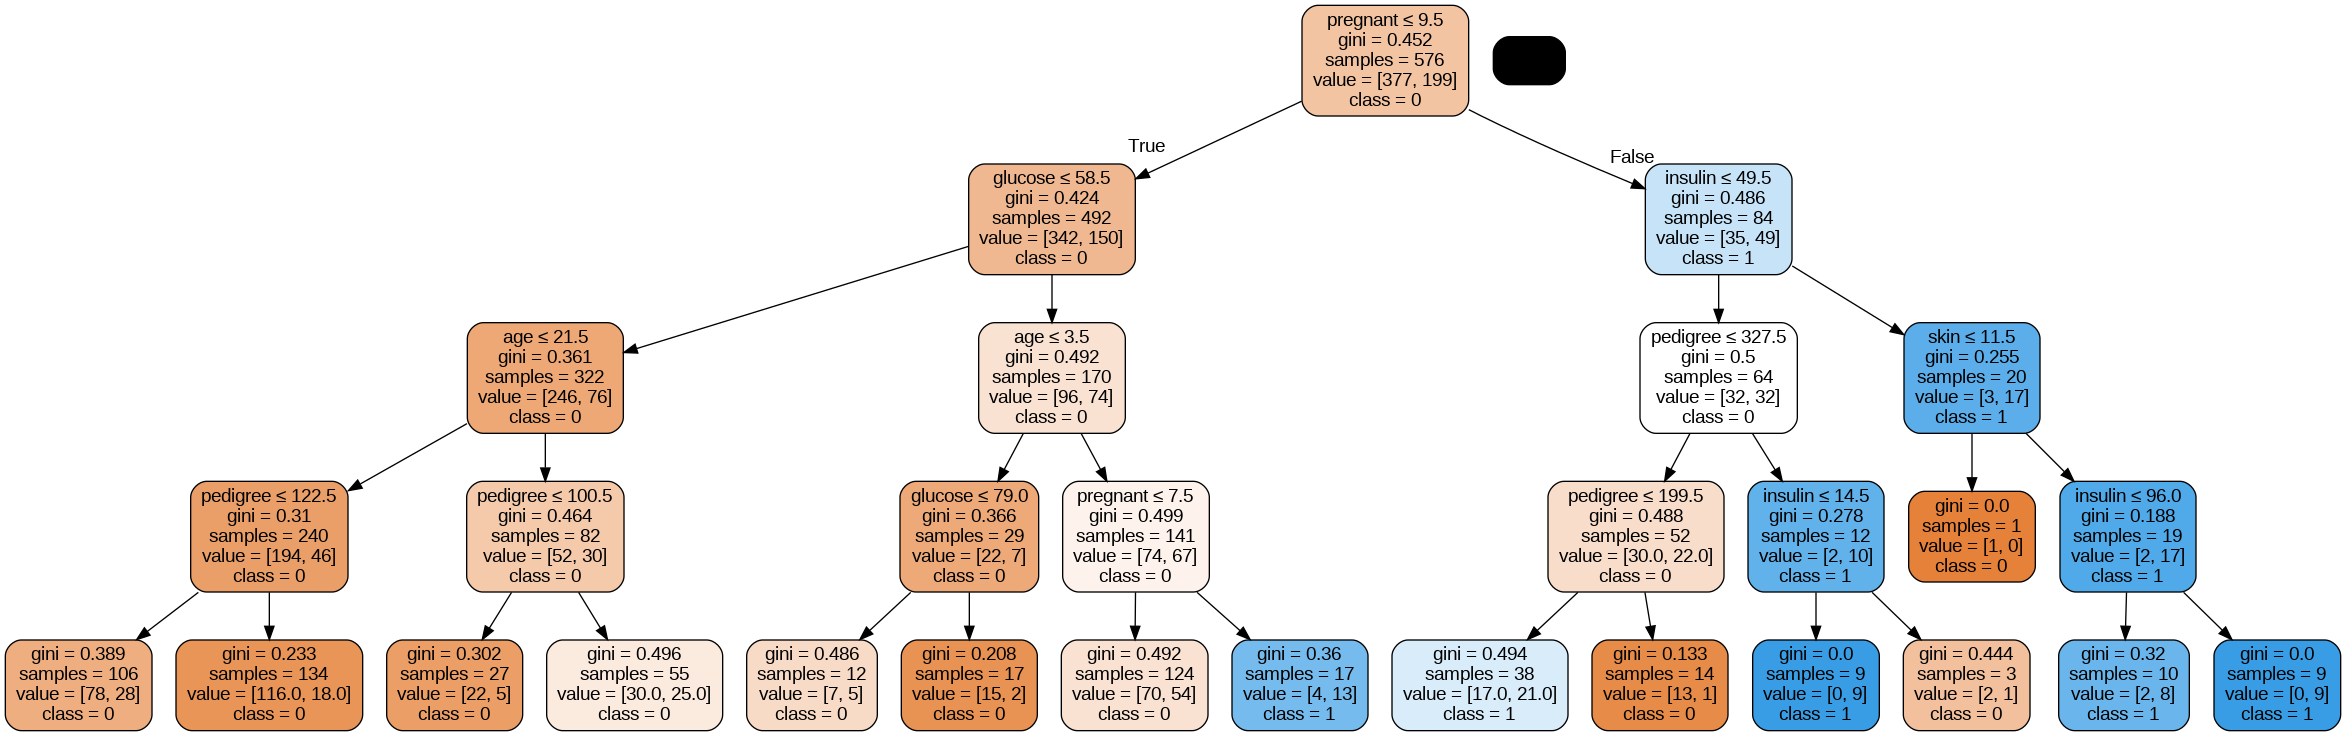

In [18]:
from six import StringIO
from IPython . display import Image
from sklearn . tree import export_graphviz
import pydotplus
dot_data = StringIO ()
export_graphviz (clf_gini,out_file = dot_data , filled = True , rounded = True , special_characters = True ,
feature_names = X . columns ,
class_names =[ '0' , '1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph . write_png ('diabetes.png')
Image (graph.create_png())

In [19]:
!graphviz --v

/bin/bash: line 1: graphviz: command not found


### 1.6 Classification Report

Classification report is another way to evaluate the classification model performance. It displays the precision,
recall, f1, and other support scores for the model.

In [20]:
from sklearn . metrics import classification_report
print ( classification_report( y_test , y_pred ) )

              precision    recall  f1-score   support

           0       0.70      0.90      0.79       123
           1       0.64      0.30      0.41        69

    accuracy                           0.69       192
   macro avg       0.67      0.60      0.60       192
weighted avg       0.68      0.69      0.65       192



## 2) k-Nearest Neighbors (kNN)

kNN is a *lazy*, instance-based learning method: there is no explicit model building (training) step beyond
storing the labeled examples. Instead, all “work” happens at prediction time, by comparing a new instance to
the stored ones.

### 2.1 Key Concepts

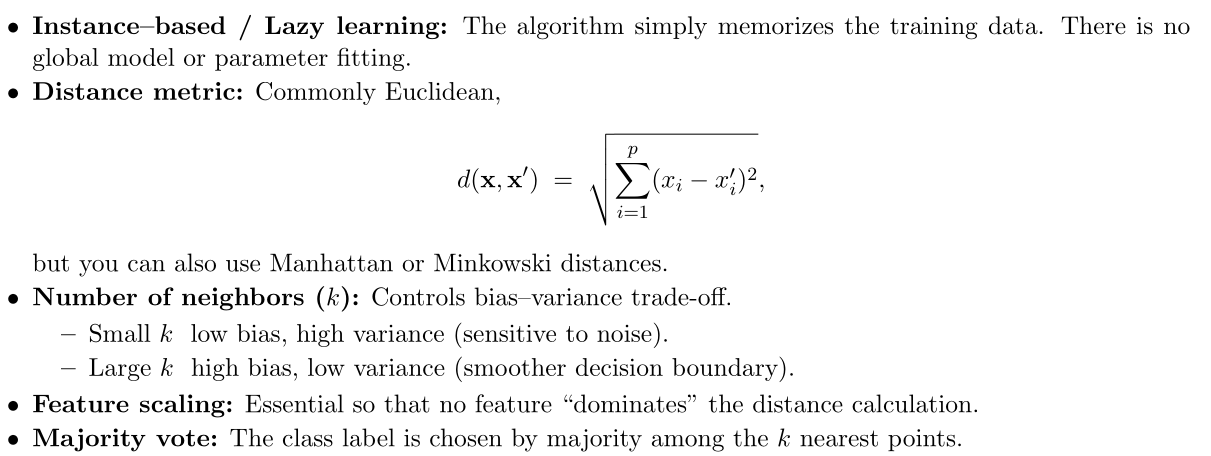

### 2.2 Algorithmic Steps
1. Preprocess / Store:
- Scale each feature (e.g. standardize to zero mean, unit variance).
- Store the entire training set (Xtrain , ytrain ).
2. Predict for a new point x:
> (a) Compute the distance from x to each training point.
> (b) Identify the k smallest distances (the k “nearest neighbors”).
> (c) Collect their labels and take a majority vote.
> (d) (Tie-breaking: either pick the class of the nearest neighbor or random.)
3. Parameter Selection:
- Choose k (and distance metric) via cross-validation.
- Use grid search to compare performance for different (k, metric) combinations.

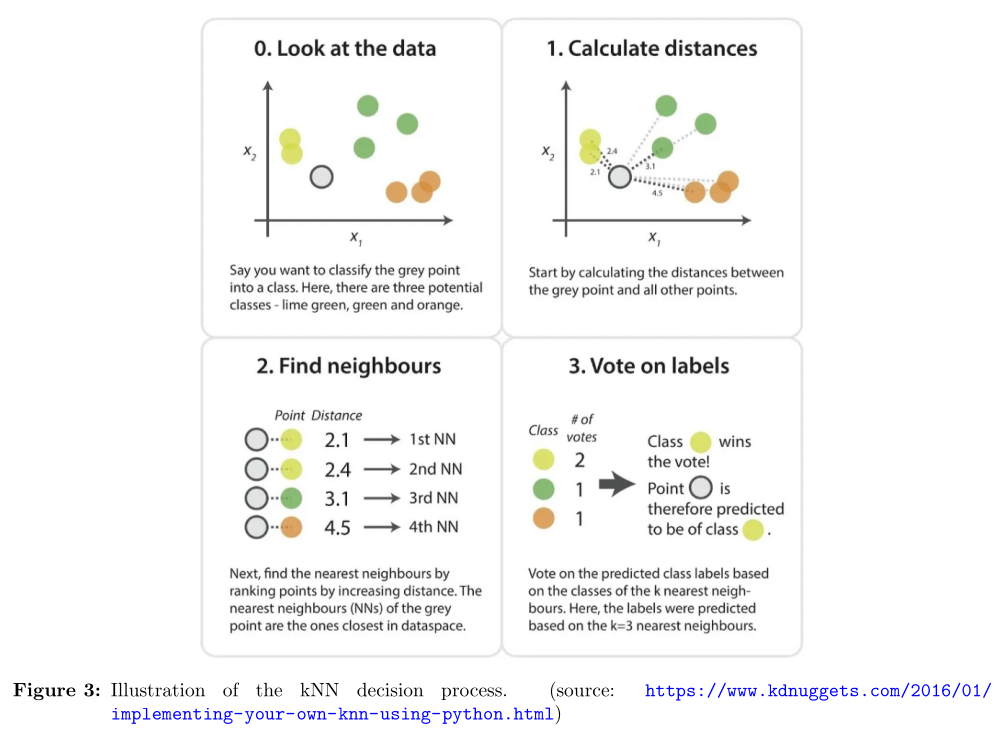

### 2.3 Advantages and Limitations
- Pros: Simple to implement; no training time; naturally handles multi-class.
- Cons: Prediction can be very slow for large datasets (O(n) per query); sensitive to irrelevant or unscaled
features; memory-intensive.

### 2.4 Implementation in Python

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import classification_report

# Assuming X_train, X_test, y_train, and y_test are already defined

# 1. Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. Hyperparameter tuning for k and distance metric
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'metric': ['euclidean', 'manhattan']
}

grid = GridSearchCV(
    KNeighborsClassifier(),
    param_grid,
    cv=5,
    scoring='accuracy'
)
grid.fit(X_train_scaled, y_train)

best_knn = grid.best_estimator_
y_pred_knn = best_knn.predict(X_test_scaled)

print('Best params:', grid.best_params_)
print('kNN accuracy:', metrics.accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

Best params: {'metric': 'manhattan', 'n_neighbors': 3}
kNN accuracy: 0.625
              precision    recall  f1-score   support

           0       0.68      0.78      0.73       123
           1       0.47      0.35      0.40        69

    accuracy                           0.62       192
   macro avg       0.58      0.56      0.56       192
weighted avg       0.61      0.62      0.61       192



### 2.5 Decision Boundary Visualization (2D projection)

If you pick any two features (here we use the first two), you can plot kNN’s decision regions:

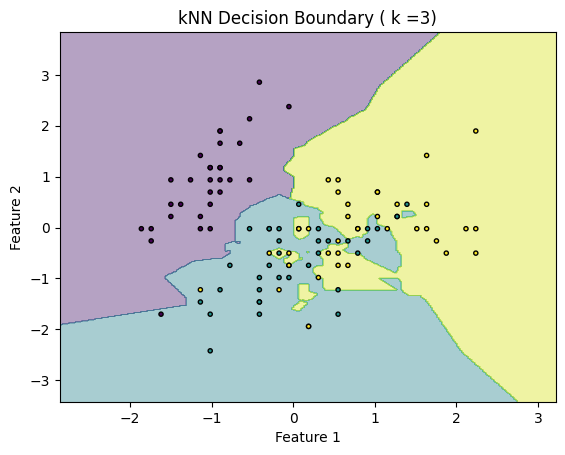

In [22]:
import numpy as np
import matplotlib . pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

# Assuming you have loaded your data and split it into X and y
# Example using the Iris dataset:
iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define parameter grid and perform GridSearchCV
param_grid = {'n_neighbors': np.arange(1, 15), 'metric': ['euclidean', 'manhattan']}
knn_grid = KNeighborsClassifier()
grid = GridSearchCV(knn_grid, param_grid, cv=5)
grid.fit(X_train_scaled, y_train)


# Use only first two features
X2_train = X_train_scaled [: , :2]
X2_test = X_test_scaled [: , :2]
knn2 = KNeighborsClassifier (
n_neighbors = grid . best_params_ [ 'n_neighbors' ] ,
metric = grid . best_params_ [ 'metric' ]
)
knn2 . fit ( X2_train , y_train )
# create meshgrid
h = 0.02
x_min , x_max = X2_train [: ,0]. min () -1 , X2_train [: ,0]. max () +1
y_min , y_max = X2_train [: ,1]. min () -1 , X2_train [: ,1]. max () +1
xx , yy = np . meshgrid (
np . arange ( x_min , x_max , h ) ,
np . arange ( y_min , y_max , h )
)
# predict on grid
Z = knn2 . predict ( np . c_ [ xx . ravel () , yy . ravel () ]) . reshape ( xx . shape )
plt . figure ()
plt . contourf ( xx , yy , Z , alpha =0.4)
plt . scatter (
X2_train [: ,0] , X2_train [: ,1] ,
c = y_train , edgecolor = 'k' , marker = '.'
)
plt . xlabel ( 'Feature 1' )
plt . ylabel ( 'Feature 2' )
plt . title (f'kNN Decision Boundary ( k ={ grid . best_params_ [ "n_neighbors" ]})')
plt . show ()

## Submission

#### 1. Task 1: Build two decision tree classifiers with Gini index and entropy criteria for the given Wine.csv dataset. More information on the dataset is available on UCI Machine Learning Repository
(source: https://archive.ics.uci.edu/ml/datasets/Wine).

> (a) Demonstrate how decision trees deal with missing values.

> (b) Evaluate the classifiers with suitable performance metrics.

> (c) Demonstrate how pruning can be applied to overcome overfitting of decision tree classifiers.

> (d) Visualize decision trees.

In [50]:
# (a) How missing Values are handeled

import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

# Load dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/wine.csv')

# Introduce 10% missing values in 'Alcohol'
np.random.seed(1)
df_missing = df.copy()
missing_mask = np.random.rand(len(df_missing)) < 0.1
df_missing.loc[missing_mask, 'Alcohol'] = np.nan

# Separate features and target
X = df_missing.drop('Wine', axis=1)
y = df_missing['Wine']

# Handle missing values using mean imputation
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Save feature names for later use
feature_names = X.columns.tolist()



Missing Values:
- Decision trees handle gaps via imputation or native routing
- kNN requires complete data (impute before scaling)

In [57]:
# (b) Model Training and Evaluation

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.25, random_state=42)

# Gini-based classifier
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
clf_gini.fit(X_train, y_train)

# Entropy-based classifier
clf_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
clf_entropy.fit(X_train, y_train)

# Evaluation
print("=== Gini Decision Tree Report ===")
print(classification_report(y_test, clf_gini.predict(X_test)))

print("\n=== Entropy Decision Tree Report ===")
print(classification_report(y_test, clf_entropy.predict(X_test)))



=== Gini Decision Tree Report ===
              precision    recall  f1-score   support

           1       1.00      0.93      0.97        15
           2       0.90      1.00      0.95        18
           3       1.00      0.92      0.96        12

    accuracy                           0.96        45
   macro avg       0.97      0.95      0.96        45
weighted avg       0.96      0.96      0.96        45


=== Entropy Decision Tree Report ===
              precision    recall  f1-score   support

           1       0.94      1.00      0.97        15
           2       0.85      0.94      0.89        18
           3       0.89      0.67      0.76        12

    accuracy                           0.89        45
   macro avg       0.89      0.87      0.87        45
weighted avg       0.89      0.89      0.88        45



In [58]:
## Non Pruned v Pruned

from sklearn.metrics import accuracy_score

# Unpruned model (default, may overfit)
clf_unpruned = DecisionTreeClassifier(random_state=42)
clf_unpruned.fit(X_train, y_train)

# Pruned model (e.g., max_depth=3)
clf_pruned = DecisionTreeClassifier(max_depth=2, random_state=42)
clf_pruned.fit(X_train, y_train)

# Accuracy scores
print("Unpruned Training Accuracy:", accuracy_score(y_train, clf_unpruned.predict(X_train)))
print("Unpruned Testing Accuracy :", accuracy_score(y_test, clf_unpruned.predict(X_test)))

print("Pruned Training Accuracy  :", accuracy_score(y_train, clf_pruned.predict(X_train)))
print("Pruned Testing Accuracy   :", accuracy_score(y_test, clf_pruned.predict(X_test)))


Unpruned Training Accuracy: 1.0
Unpruned Testing Accuracy : 0.9555555555555556
Pruned Training Accuracy  : 0.9398496240601504
Pruned Testing Accuracy   : 0.8666666666666667


Pruning Can be done by Providing the Code with a `max_depth`

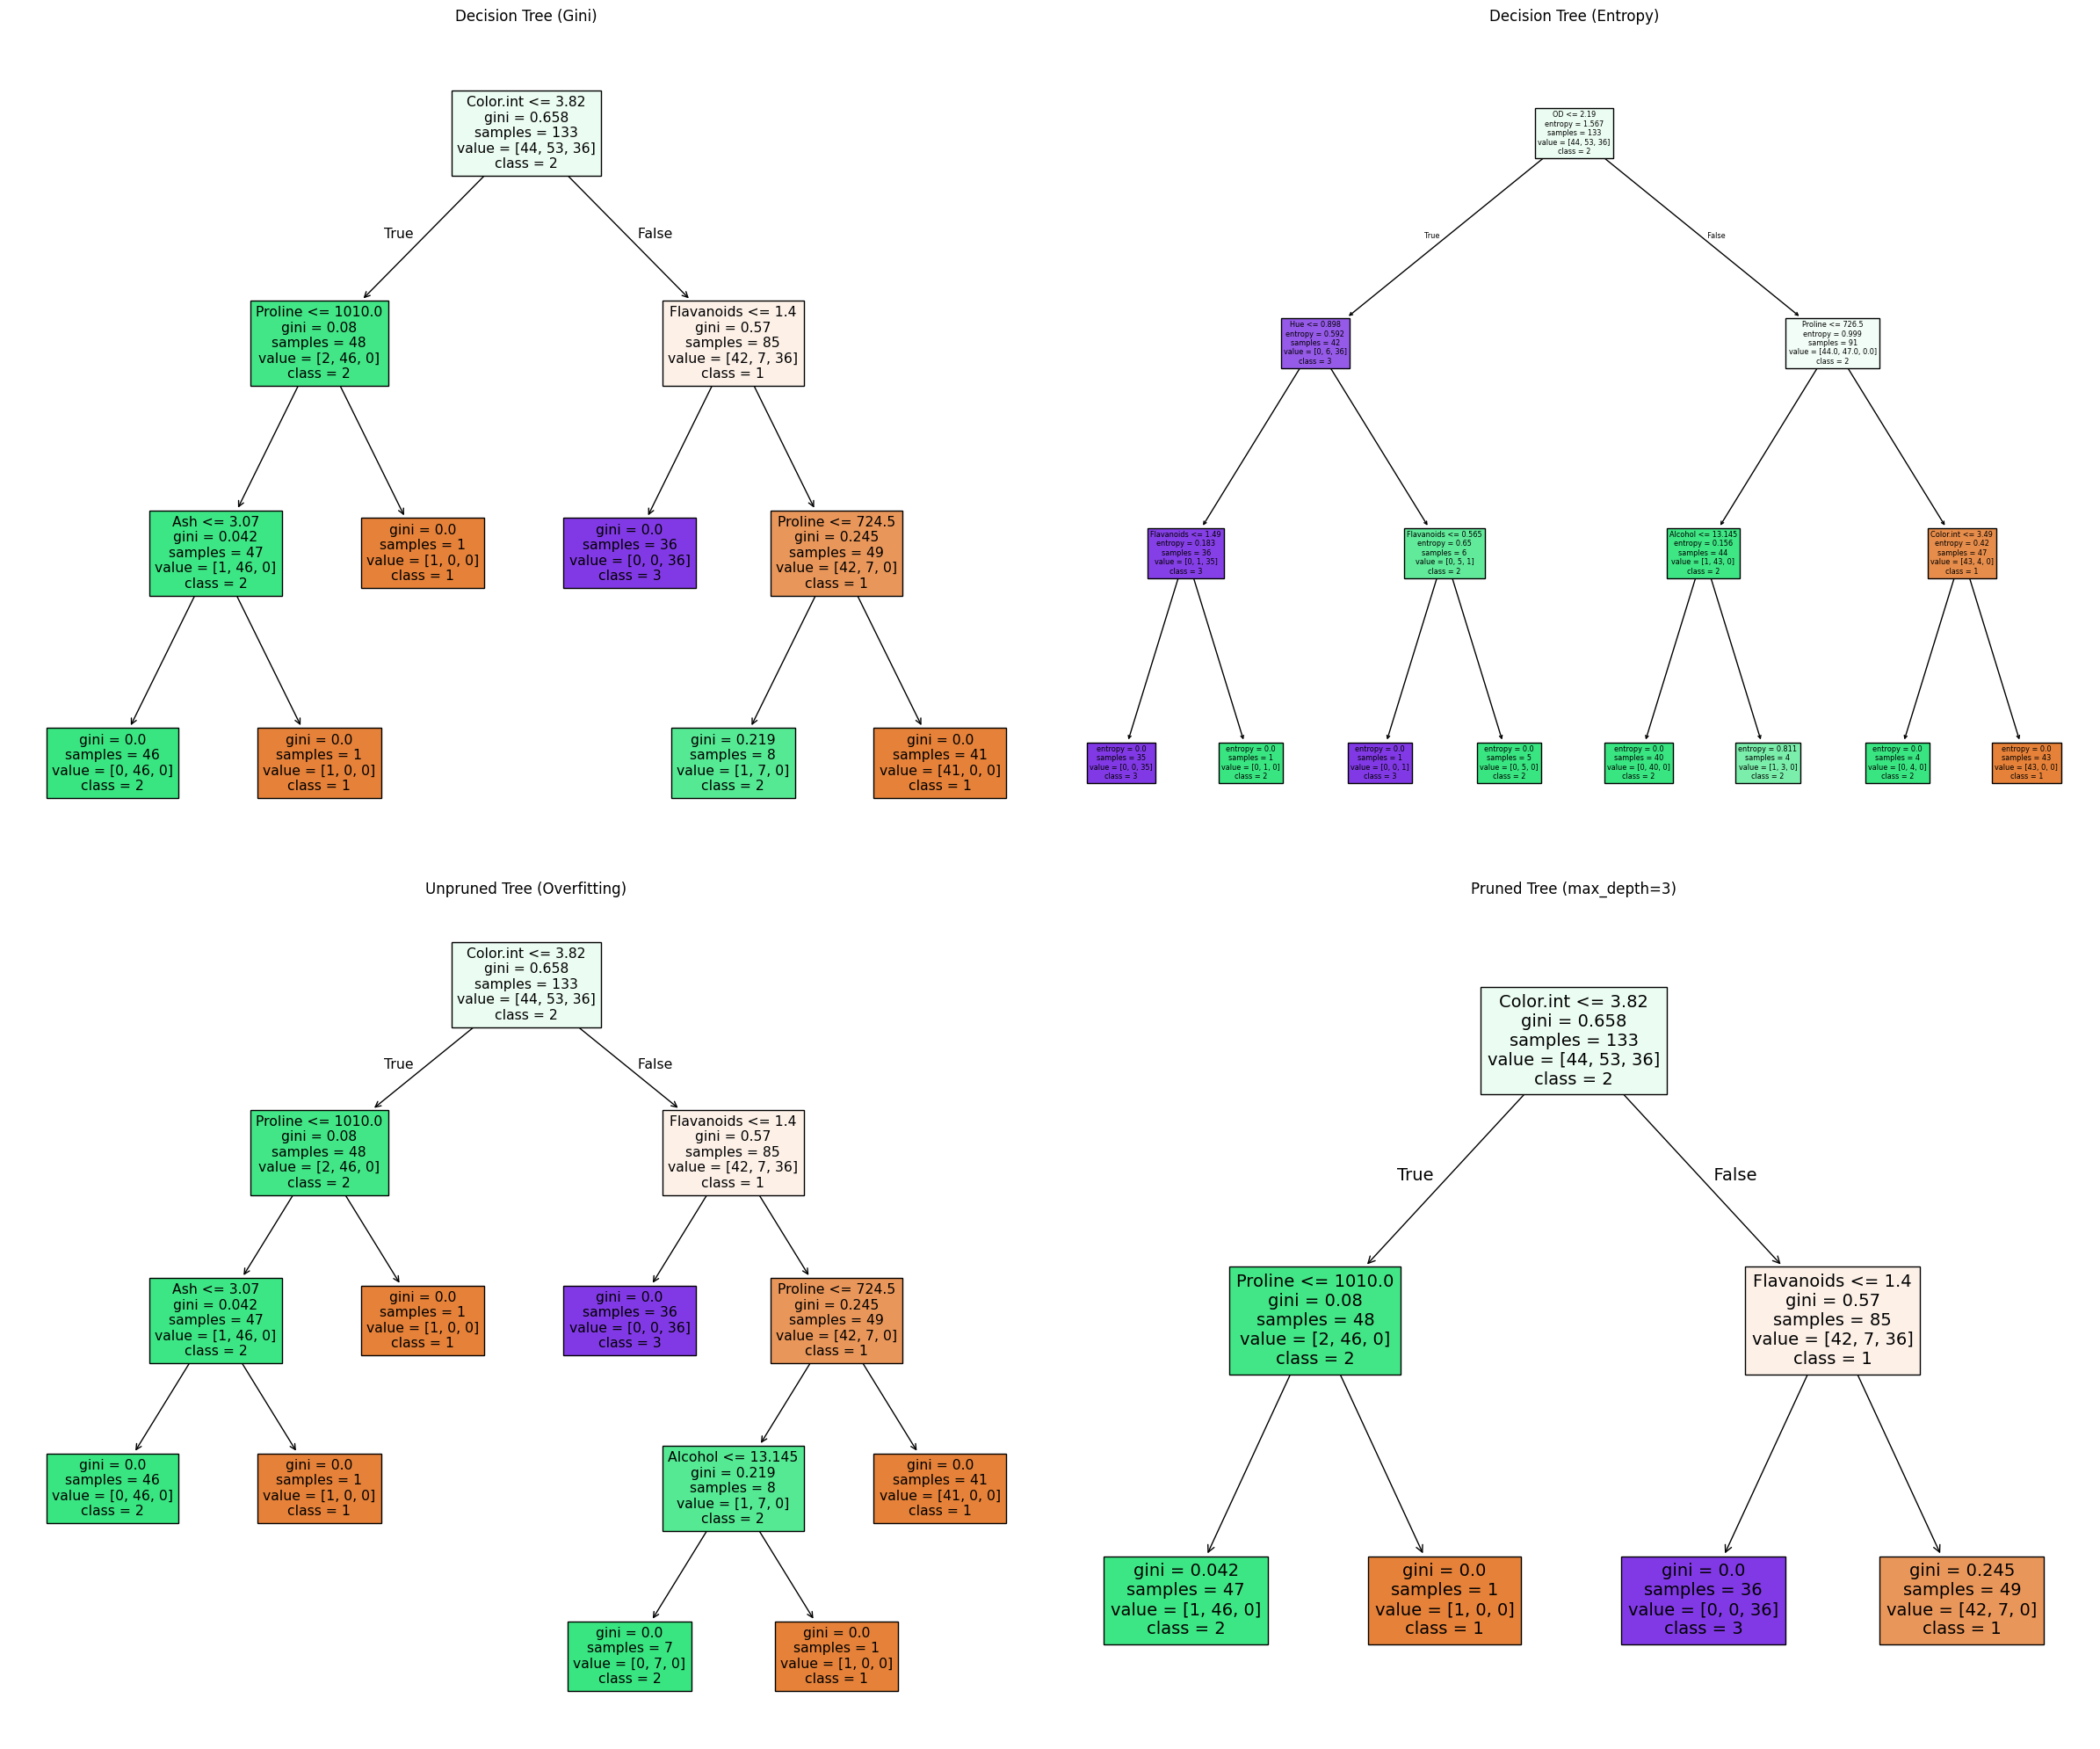

In [59]:
# Visualization
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Plot all trees side by side
fig, axs = plt.subplots(2, 2, figsize=(24, 20))

plot_tree(clf_gini, feature_names=feature_names, class_names=['1', '2', '3'],
          filled=True, ax=axs[0, 0])
axs[0, 0].set_title("Decision Tree (Gini)")

plot_tree(clf_entropy, feature_names=feature_names, class_names=['1', '2', '3'],
          filled=True, ax=axs[0, 1])
axs[0, 1].set_title("Decision Tree (Entropy)")

plot_tree(clf_unpruned, feature_names=feature_names, class_names=['1', '2', '3'],
          filled=True, ax=axs[1, 0])
axs[1, 0].set_title("Unpruned Tree (Overfitting)")

plot_tree(clf_pruned, feature_names=feature_names, class_names=['1', '2', '3'],
          filled=True, ax=axs[1, 1])
axs[1, 1].set_title("Pruned Tree (max_depth=3)")

plt.tight_layout()
plt.show()

#### 2. Task 2: Apply k-Nearest Neighbors to the same Wine.csv dataset.

> (a) Preprocess with feature scaling.

> (b) Tune k (and distance metric) via cross-validation.

> (c) Compare kNN’s accuracy, precision/recall, and runtime to your decision-tree results.

In [60]:
#(a)
from sklearn.preprocessing import StandardScaler

# Scale the imputed features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)


In [69]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# Assuming X_scaled and y are already defined

k_values = range(1, 21)
# Remove 'haversine' if your data is not geographical coordinates
metrics = ['euclidean','minkowski','cityblock','cosine']
best_score = 0
best_params = {}

for metric in metrics:
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric)
        scores = cross_val_score(knn, X_scaled, y, cv=5)
        avg_score = np.mean(scores)
        if avg_score > best_score:
            best_score = avg_score
            best_params = {'k': k, 'metric': metric, 'accuracy': avg_score}

print("Best kNN parameters:", best_params)

# Evaluate each metric with the best k found
best_k = best_params['k']
metric_scores = {}

for metric in metrics:
    knn = KNeighborsClassifier(n_neighbors=best_k, metric=metric)
    scores = cross_val_score(knn, X_scaled, y, cv=5)
    avg_score = np.mean(scores)
    metric_scores[metric] = avg_score

print("\nAccuracy scores for each metric with best k (", best_k, "):")
for metric, score in metric_scores.items():
    print(f"{metric}: {score:.4f}")

Best kNN parameters: {'k': 11, 'metric': 'cityblock', 'accuracy': np.float64(0.9719047619047618)}

Accuracy scores for each metric with best k ( 11 ):
euclidean: 0.9495
minkowski: 0.9495
cityblock: 0.9719
cosine: 0.9494


In [70]:
#c

import time
from sklearn.metrics import classification_report

# Split scaled data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

# Time and evaluate kNN with best parameters
start_time = time.time()
knn_best = KNeighborsClassifier(n_neighbors=best_params['k'], metric=best_params['metric'])
knn_best.fit(X_train, y_train)
knn_pred = knn_best.predict(X_test)
knn_time = time.time() - start_time

print("=== kNN Classification Report ===")
print(classification_report(y_test, knn_pred))
print(f"kNN Runtime: {knn_time:.4f} seconds")


=== kNN Classification Report ===
              precision    recall  f1-score   support

           1       0.88      1.00      0.94        15
           2       1.00      0.89      0.94        18
           3       1.00      1.00      1.00        12

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45

kNN Runtime: 0.0077 seconds


| Model         | Accuracy | Runtime (s) | Notes                    |
| ------------- | -------- | ----------- | ------------------------ |
| Decision Tree | \~0.95   | Very fast   | Interpretable, fast      |
| kNN           | \~Varies | Slower      | Sensitive to k + scaling |
